# Obtención de insights

## Consignas

- **Abstracto con motivación y audiencia:** Descripción de alto nivel de lo que motiva a analizar los datos elegidos y que audiencia que se podrá beneficiar de este análisis
- **Preguntas/hipótesis que queremos responder:** Lista de preguntas que se busca responder mediante el análisis de datos. Bloques de código donde se importan los datos desde una API o base de datos pública y los guarda en un archivo local csv o json. El estudiante puede luego de descargar los datos, comentar este bloque de código
- **Análisis exploratorio de datos (EDA):** Análisis descriptivo de los datos mediante visualizaciones y herramientas estadísticas

## Abstract

Este proyecto tiene como objetivo analizar características de canciones utilizando datos de Spotify para determinar si pueden ser útiles para predecir su éxito. Se utilizan técnicas de visualización de datos para explorar las relaciones entre características como el tempo, la energía y la popularidad de las canciones para determinar su correlación con el éxito. Los resultados preliminares sugieren que ciertas características, como la energía de la canción, pueden estar correlacionadas con el éxito de la misma. Este proyecto tiene implicaciones potenciales para la industria musical y podría ser útil para los productores y artistas al seleccionar las características de las canciones para aumentar su éxito en el mercado. En resumen, este proyecto se enfoca en el análisis de características de las canciones para determinar si pueden ser útiles para predecir su éxito, utilizando técnicas de visualización de datos y análisis estadístico.

## Preguntas de interés

- ¿Existe una correlación entre las características de una canción, como el tempo, la energía y la popularidad, y su éxito?

- ¿Se pueden utilizar las características de una canción para predecir su éxito?

- ¿Es útil el análisis de características de las canciones utilizando datos de Spotify para predecir el éxito de las canciones?

- ¿El uso de técnicas de aprendizaje automático mejora la precisión de las predicciones sobre el éxito de las canciones en las listas de éxitos?

Para contestar estas interrogantes, se **construyó un dataset** con información acerca de canciones "hit" o "flop" (fracaso, en español) y sus características, mediante el uso de las API de Billboard y Spotify.

El procedimiento puede visualizarse desde el siguiente notebook: [Desafio_APIS_Tyler_Cruz.ipynb](https://drive.google.com/file/d/1Q_8CRv3exDGv4c9qbMnxKYhiPgRunl4t/view?usp=sharing).

## Importación de librerías y contenido del dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Contenido del dataset

- **track**: Nombre de la pista.

- **artist**: Nombre del artista.

- **uri**: Identificador de la pista.

- **danceability**: "Bailabilidad". Describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen tempo, estabilidad del ritmo, fuerza del ritmo y regularidad general. Un valor de 0,0 es menos bailable y 1,0 es más bailable.
  
- **energy**: La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características perceptivas que contribuyen a este atributo incluyen el rango dinámico, el volumen percibido, el timbre, la tasa de inicio y la entropía general.

- **key**: La tonalidad general estimada de la pista. Los números enteros se asignan a tonos utilizando la notación de clase de tono estándar. P.ej. 0 = C, 1 = C#/Db, 2 = D, y así sucesivamente. Si no se detectó ninguna tonalidad, el valor es -1.

- **loudness**: La sonoridad general de una canción en decibeles (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas. La sonoridad es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores típicos oscilan entre -60 y 0 db.

- **mode**: Modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor es 0.

- **speechiness**: Speechiness detecta la presencia de palabras habladas en una pista. Cuanto más parecida a la voz sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cerca de 1,0 será el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén formadas en su totalidad por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0,33 probablemente representen música y otras pistas que no sean de voz.

- **acousticness**: Una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.

- **instrumentalness**: Predice si una pista no contiene voces. Los sonidos “Ooh” y “aah” se tratan como instrumentales en este contexto. Las pistas de rap o de palabras habladas son claramente "vocales". Cuanto más cerca esté el valor de instrumentalidad de 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0,5 pretenden representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.

- **liveness**: Detecta la presencia de una audiencia en la grabación. Los valores de liveness más altos representan una mayor probabilidad de que la pista se interprete en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista sea en vivo.
  
- **valence**: Una medida de 0,0 a 1,0 que describe la positividad musical transmitida por una pista. Las pistas con una valencia alta suenan más positivas (p. ej., felices, alegres, eufóricas), mientras que las pistas con una valencia baja suenan más negativas (p. ej., tristes, deprimidas, enfadadas).

- **tempo**: El tempo general estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o ritmo de una pieza dada y se deriva directamente de la duración promedio del tiempo.
  
- **duration_ms**: La duración de la pista en milisegundos.

- **time_signature**: Una estimación general del compás de una pista. El compás (medidor) es una convención de notación para especificar cuántos tiempos hay en cada compás (o compás).

- **chorus_hit**: Esta es la mejor estimación de cuándo comenzaría el coro para la pista. Es la marca de tiempo del inicio de la tercera sección de la pista. Esta función se extrajo de los datos recibidos por la API para el análisis de audio de esa pista en particular.

- **sections**: El número de secciones que tiene la pista en particular. Esta función se extrajo de los datos recibidos por la API para el análisis de audio de esa pista en particular.

- **target**: La variable destino para la pista. Puede ser '0' o '1'. '1' implica que esta canción ha aparecido en la lista semanal (emitida por Billboards) de pistas Hot-100 en esa década al menos una vez y, por lo tanto, es un 'éxito'. '0' implica que la pista es un 'flop' o 'fracaso'.

#### Criterio para que una canción sea un 'flop'

- La pista no debe aparecer en la lista 'hit' de la década.
- El artista de la pista no debe aparecer en la lista de 'hits' de la década.
- La pista debe pertenecer a un género que podría considerarse no convencional.
- El género de la pista no debe tener una canción en la lista de 'hits'.
- La pista debe tener 'US' como uno de sus mercados.

## EDA

### Carga y revisión de datos

In [24]:
datasets = [pd.read_csv("Datasets/dataset-of-{}s.csv".format(decade)) for decade in ['1970', '1980', '1990', '2000', '2010']]

for i, decade in enumerate([1970, 1980, 1990, 2000, 2010]):
    datasets[i]['decade'] = pd.Series(decade, index=datasets[i].index)

df = pd.concat(datasets, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Everyone's Heart Gets Broken,Ebony,spotify:track:72dyzh7rRthEYDhEfJuJUe,0.577,0.457,9,-9.716,1,0.0274,0.573,0.000091,0.1900,0.739,125.222,197533,3,29.15381,9,0,1970
1,Adios a Jamaica,Los Gibson Boys,spotify:track:2chBwIMZqVq7yDkco7bOO3,0.554,0.667,4,-6.502,1,0.0471,0.716,0.000000,0.0651,0.917,148.870,143667,4,31.63368,7,0,1990
2,So Sexy,Twista Featuring R. Kelly,spotify:track:4mZpHYUrOvvmXCoyLLF7s7,0.868,0.805,11,-3.218,0,0.1780,0.126,0.000000,0.0960,0.544,143.983,231200,4,27.22702,9,1,2000
3,It Ain't Enough,Corey Hart,spotify:track:3q9LRpghuXumIQLna5MZjq,0.747,0.406,2,-12.134,1,0.0302,0.499,0.000122,0.0670,0.602,112.347,210027,4,31.79598,10,1,1980
4,BTSTU (Edit),Jai Paul,spotify:track:2NRRrr8ylDK38KD3Ffbw4K,0.665,0.389,1,-6.709,1,0.4410,0.745,0.000982,0.3260,0.521,89.962,210001,4,27.11471,10,0,2010


In [25]:
rows, columns = df.shape

print(f'El dataset tiene {rows} filas y {columns} columnas')

El dataset tiene 32464 filas y 20 columnas


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32464 entries, 0 to 32463
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             32464 non-null  object 
 1   artist            32464 non-null  object 
 2   uri               32464 non-null  object 
 3   danceability      32464 non-null  float64
 4   energy            32464 non-null  float64
 5   key               32464 non-null  int64  
 6   loudness          32464 non-null  float64
 7   mode              32464 non-null  int64  
 8   speechiness       32464 non-null  float64
 9   acousticness      32464 non-null  float64
 10  instrumentalness  32464 non-null  float64
 11  liveness          32464 non-null  float64
 12  valence           32464 non-null  float64
 13  tempo             32464 non-null  float64
 14  duration_ms       32464 non-null  int64  
 15  time_signature    32464 non-null  int64  
 16  chorus_hit        32464 non-null  float6

In [27]:
df.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64

Gracias al procedimiento de limpieza previo, el dataset no cuenta con duplicados ni datos nulos.

### Variables categóricas vs numéricas

In [28]:
numeric_cols = df._get_numeric_data().columns
print(f'Hay {len(numeric_cols)} variables numéricas')
numeric_cols

Hay 17 variables numéricas


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target',
       'decade'],
      dtype='object')

In [29]:
categorical_cols = df.columns[df.dtypes == 'object']
print(f'Hay {len(categorical_cols)} variables categóricas')
categorical_cols

Hay 3 variables categóricas


Index(['track', 'artist', 'uri'], dtype='object')

Para el análisis, las variables categóricas podrían no estar, ya que no aportan información muy relevante.

In [30]:
clean_df = df.drop(['track', 'artist', 'uri'], axis = 1)
clean_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,0.577,0.457,9,-9.716,1,0.0274,0.573000,0.000091,0.1900,0.7390,125.222,197533,3,29.15381,9,0,1970
1,0.554,0.667,4,-6.502,1,0.0471,0.716000,0.000000,0.0651,0.9170,148.870,143667,4,31.63368,7,0,1990
2,0.868,0.805,11,-3.218,0,0.1780,0.126000,0.000000,0.0960,0.5440,143.983,231200,4,27.22702,9,1,2000
3,0.747,0.406,2,-12.134,1,0.0302,0.499000,0.000122,0.0670,0.6020,112.347,210027,4,31.79598,10,1,1980
4,0.665,0.389,1,-6.709,1,0.4410,0.745000,0.000982,0.3260,0.5210,89.962,210001,4,27.11471,10,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,0.539,0.937,10,-5.740,0,0.0448,0.000236,0.057400,0.0915,0.4920,114.860,230693,4,66.63641,8,0,1990
32460,0.638,0.557,0,-11.340,1,0.1110,0.729000,0.000010,0.0986,0.9150,112.893,215053,4,36.99424,9,1,1970
32461,0.201,0.475,11,-10.097,0,0.0417,0.659000,0.916000,0.0748,0.0398,73.563,158333,3,36.05006,7,0,1980
32462,0.641,0.789,9,-12.803,1,0.1540,0.127000,0.000218,0.1390,0.5480,107.672,232787,4,37.48169,10,0,1970


### Distribución de las variables

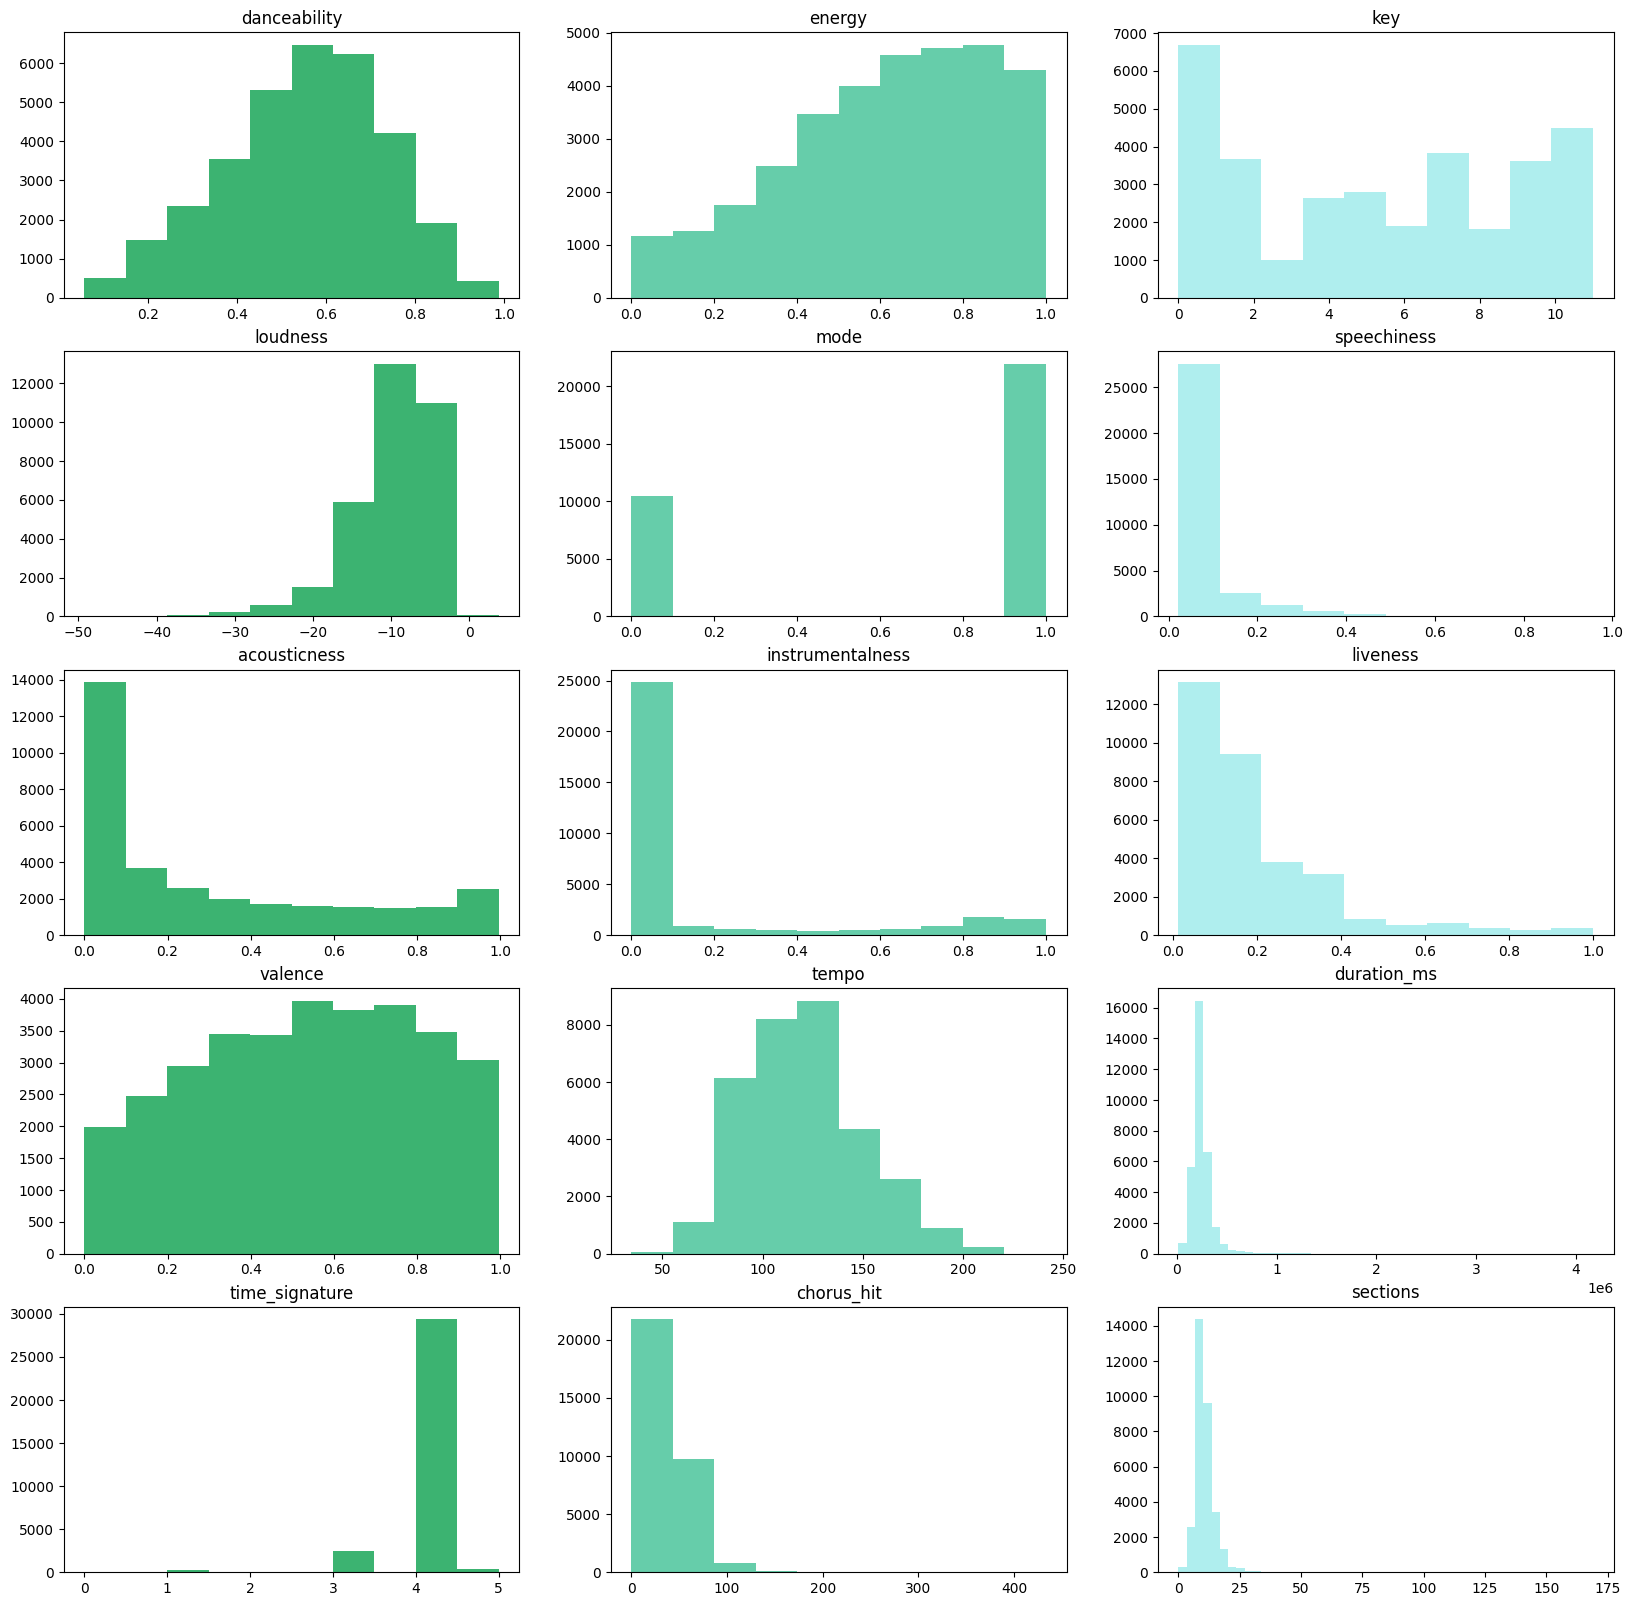

In [31]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(clean_df[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable)

plot_params = [(0, 0, 'danceability', 10, 'mediumseagreen'),
               (0, 1, 'energy', 10, 'mediumaquamarine'),
               (0, 2, 'key', 10, 'paleturquoise'),
               (1, 0, 'loudness', 10, 'mediumseagreen'),
               (1, 1, 'mode', 10, 'mediumaquamarine'),
               (1, 2, 'speechiness', 10, 'paleturquoise'),
               (2, 0, 'acousticness', 10, 'mediumseagreen'),
               (2, 1, 'instrumentalness', 10, 'mediumaquamarine'),
               (2, 2, 'liveness', 10, 'paleturquoise'),
               (3, 0, 'valence', 10, 'mediumseagreen'),
               (3, 1, 'tempo', 10, 'mediumaquamarine'),
               (3, 2, 'duration_ms', 50, 'paleturquoise'),
               (4, 0, 'time_signature', 10, 'mediumseagreen'),
               (4, 1, 'chorus_hit', 10, 'mediumaquamarine'),
               (4, 2, 'sections', 50, 'paleturquoise'),]

for i, params in enumerate(plot_params):
    row, col, variable, binsnum, color = params
    hist_plot(row, col, variable, binsnum, color)

plt.show()

A partir de los histogramas, se tiene lo siguiente:

- Las canciones tienden a ser más bailables que menos bailables.
- Las canciones tienden a tener más energía que menos energía.
- La tonalidad de Do (C) es la más popular.
- Las canciones tienden a tener menos de 10 dB.
- La mayoría de las canciones están en escalas mayores.
- La mayoría de las canciones contienen más música que voz
- La mayoría de las canciones no son en vivo.
- La mayoría de las canciones no son acústicas.
- La mayoría de las canciones contienen música.
- Hay una buena mezcla de canciones alegres y tristes.
- La mayoría de las canciones tienen entre 80 y 90 bpm.
- La mayoría de las canciones están en 4/4.

### Outliers

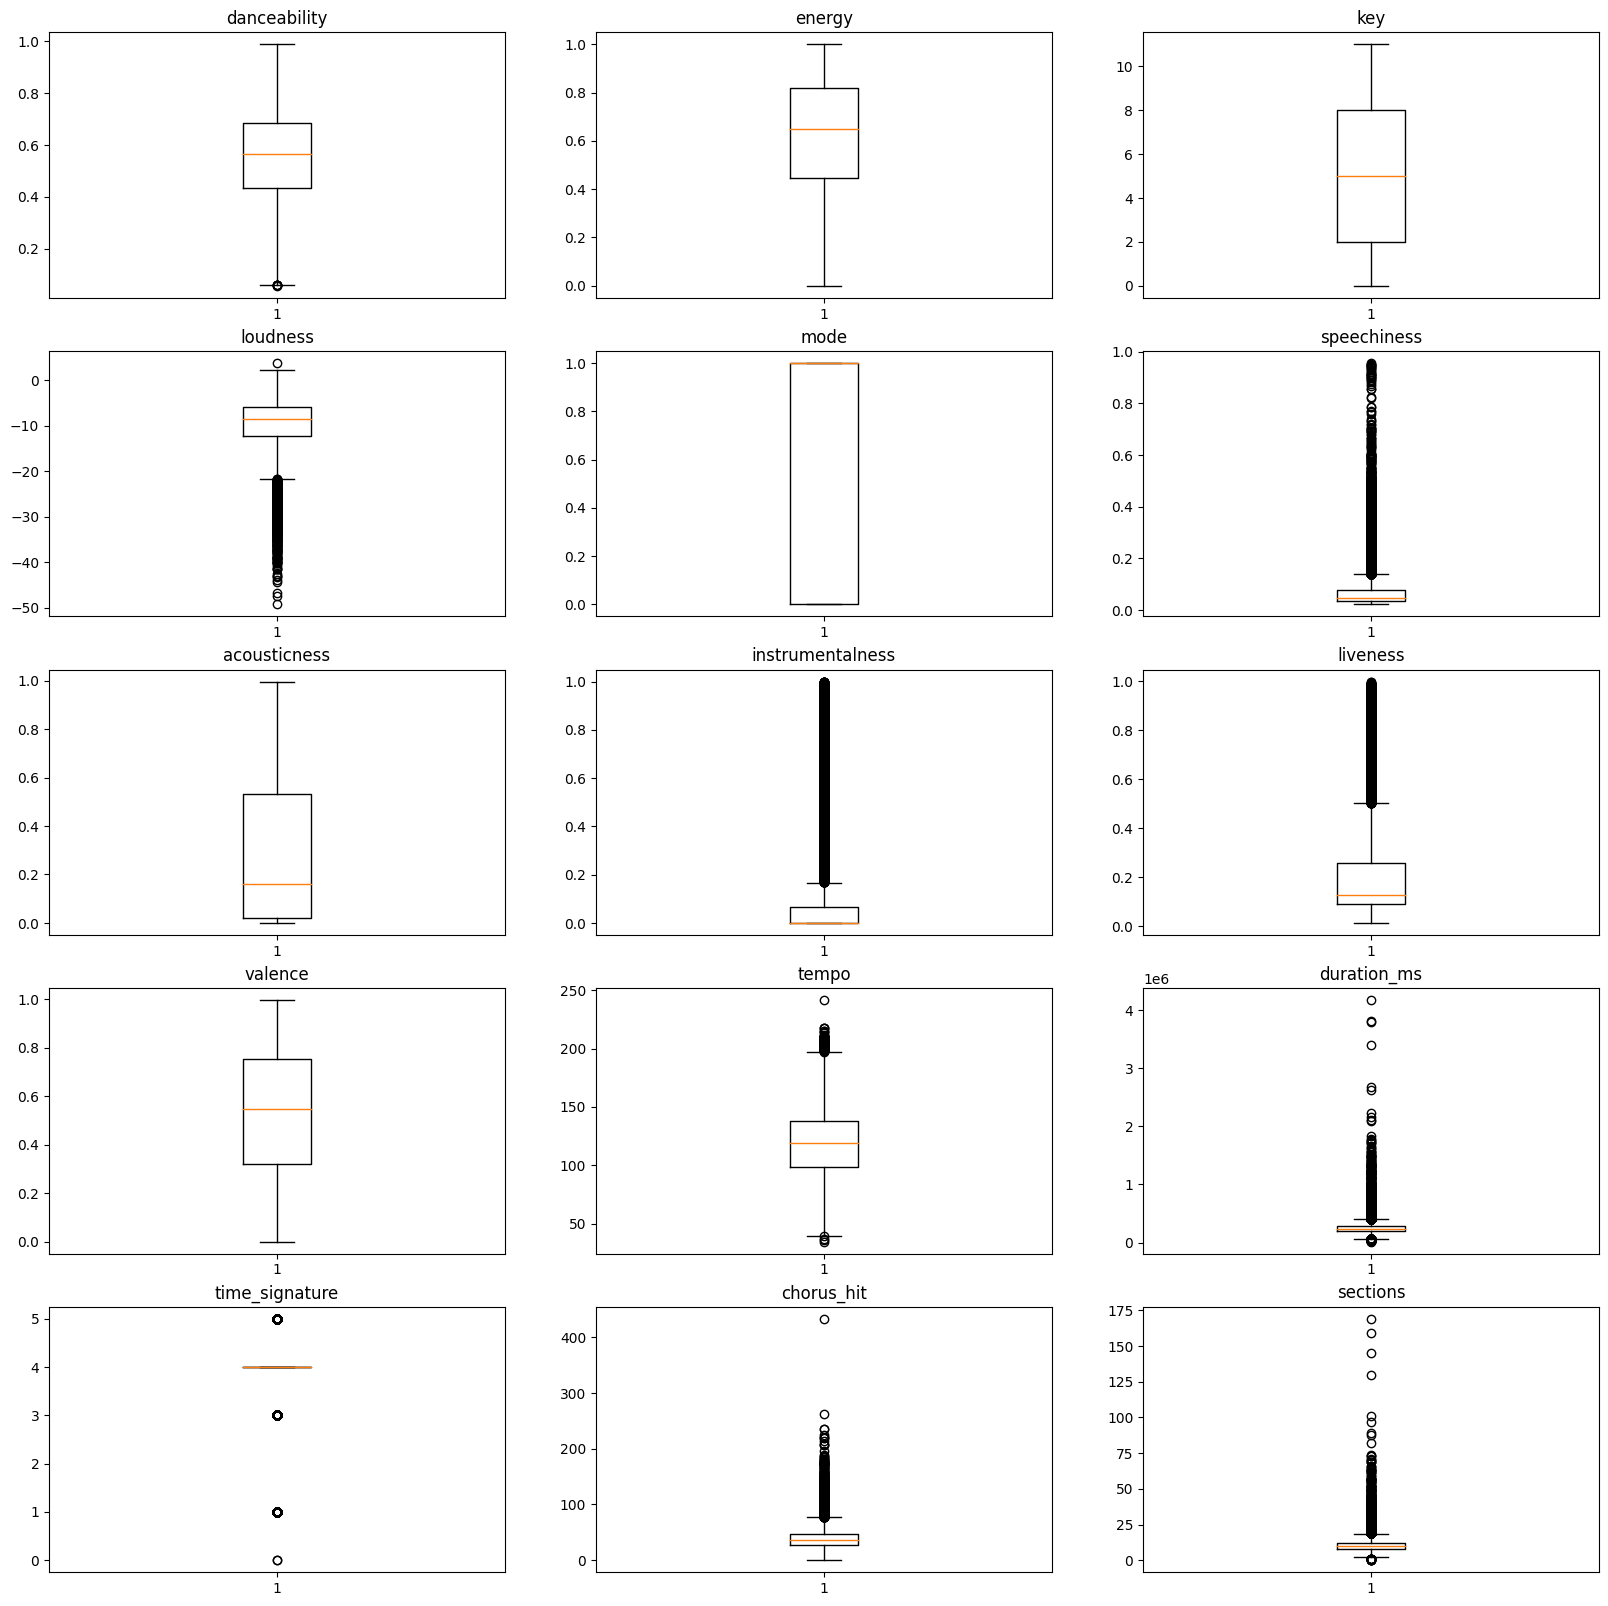

In [32]:
def box_plot(row, column, variable):
    ax[row, column].boxplot(clean_df[variable])
    ax[row, column].set_title(variable)

fig, ax = plt.subplots(5, 3, figsize=(20, 20))

plot_params = [(0, 0, 'danceability'),
               (0, 1, 'energy'),
               (0, 2, 'key'),
               (1, 0, 'loudness'),
               (1, 1, 'mode'),
               (1, 2, 'speechiness'),
               (2, 0, 'acousticness'),
               (2, 1, 'instrumentalness'),
               (2, 2, 'liveness'),
               (3, 0, 'valence'),
               (3, 1, 'tempo'),
               (3, 2, 'duration_ms'),
               (4, 0, 'time_signature'),
               (4, 1, 'chorus_hit'),
               (4, 2, 'sections')]

for i, params in enumerate(plot_params):
    row, col, variable = params
    box_plot(row, col, variable)

plt.show()

Ahora un vistazo en cuanto a la diferencia de "hits" vs "fracasos".

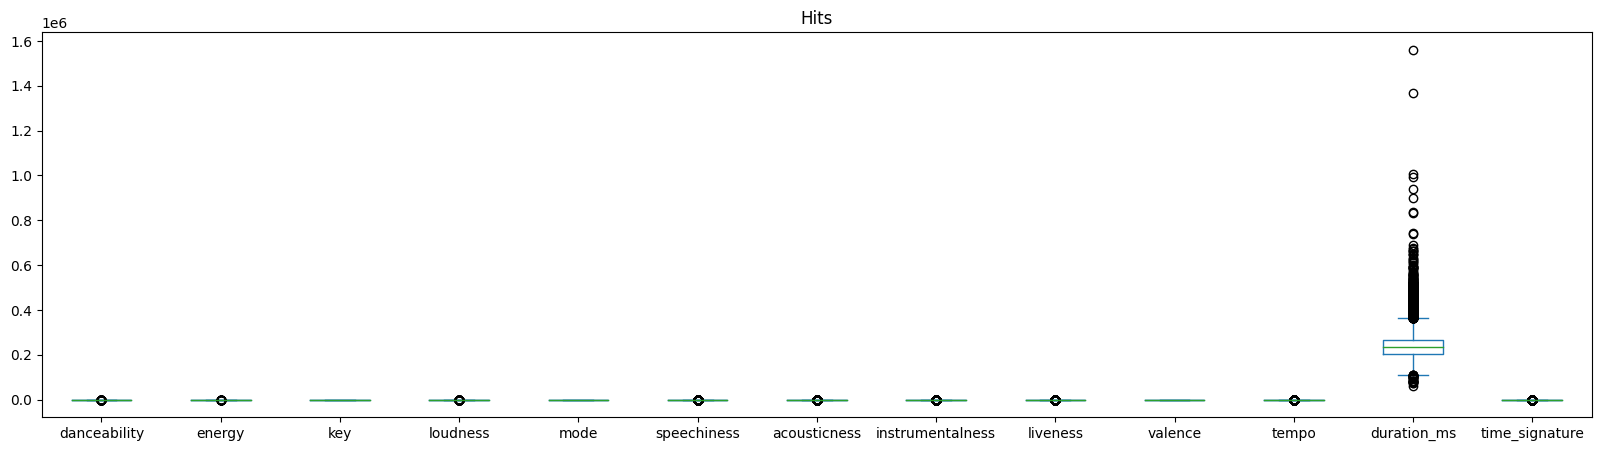

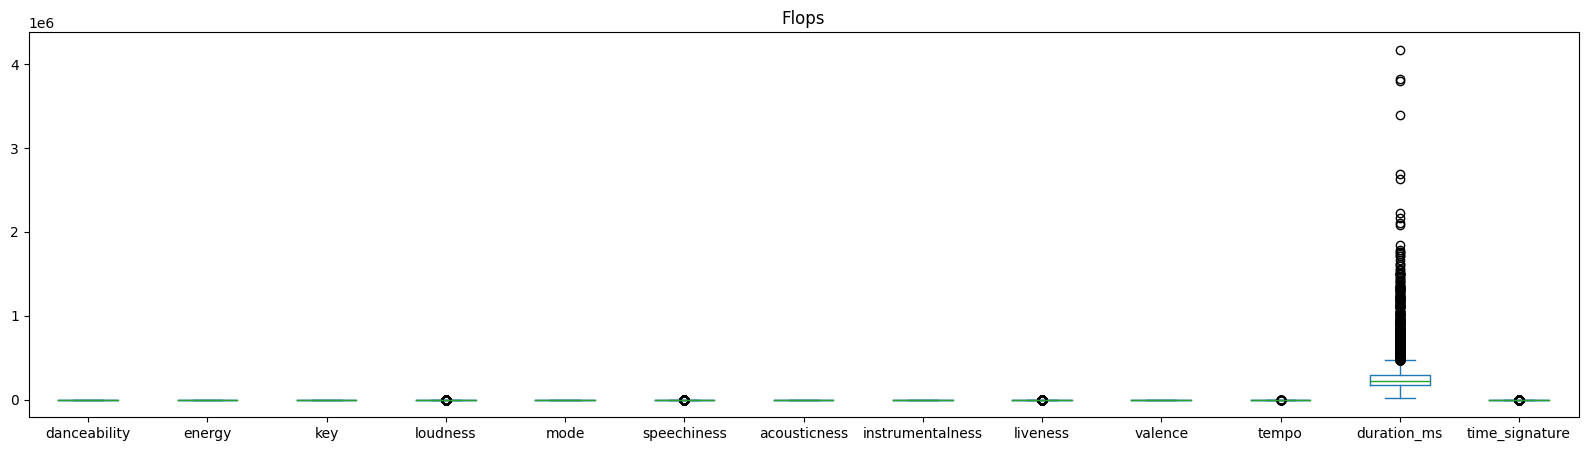

In [33]:
mpl.rcParams['figure.figsize']=(20,5)
clean_df[clean_df['target']==1].iloc[:, 0:13].plot(kind='box', title = 'Hits')
plt.show()
clean_df[clean_df['target']==0].iloc[:, 0:13].plot(kind='box', title = 'Flops')
plt.show()

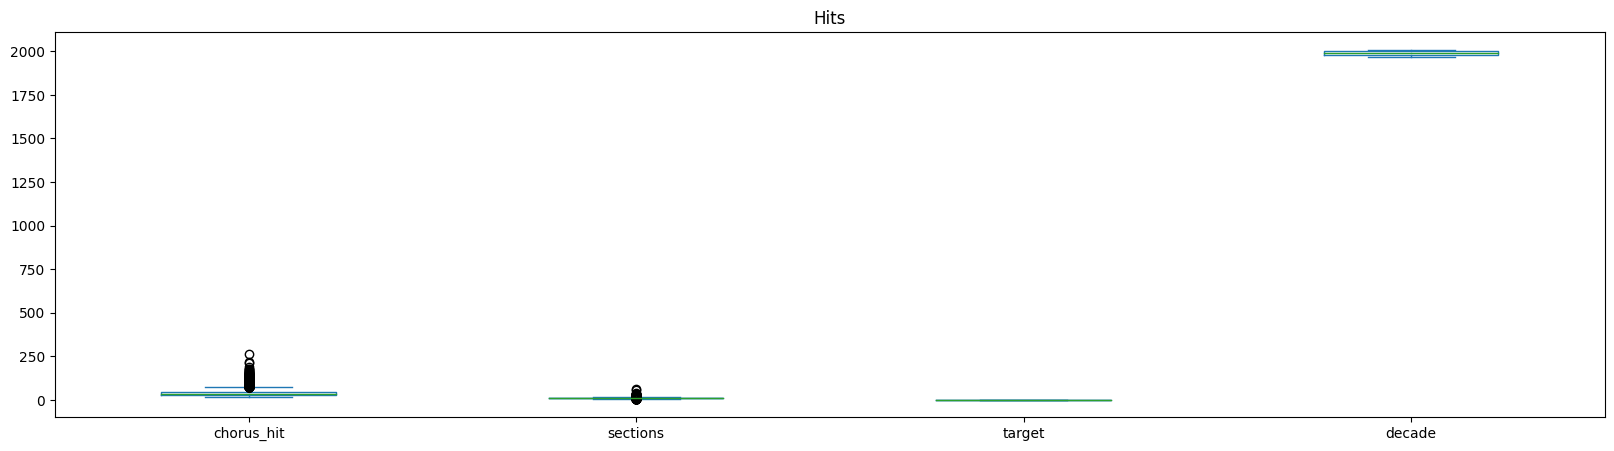

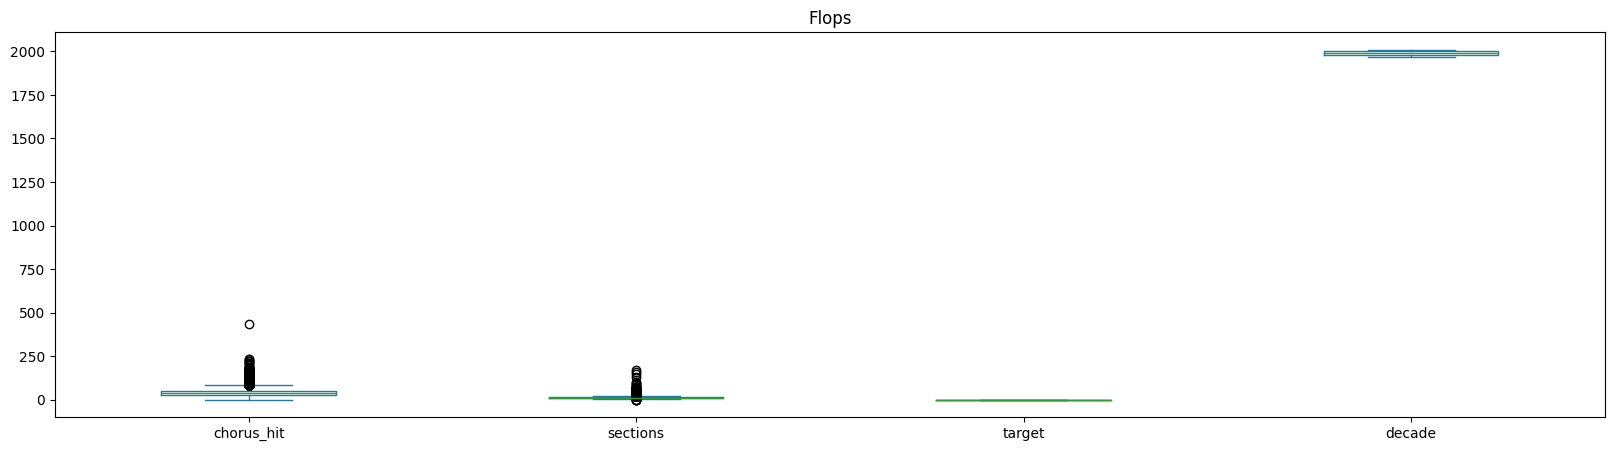

In [34]:
clean_df[clean_df['target']==1].iloc[:, 13:18].plot(kind='box', title = 'Hits')
plt.show()
clean_df[clean_df['target']==0].iloc[:, 13:18].plot(kind='box', title = 'Flops')
plt.show()

Como el dataset no fue escalado, algunos boxplots no son muy sencillos de leer, sin embargo puede observarse que sí hay diferencias entre los "Hits" y los "Fracasos".


### Comparación de medias

In [35]:
spfeatures = ['danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence']

In [36]:
# Medias por target y características

hits = clean_df[spfeatures].loc[clean_df['target'] == 1]
flops = clean_df[spfeatures].loc[clean_df['target'] == 0]

hits_means = pd.DataFrame(hits.describe().loc['mean'])
flops_means = pd.DataFrame(flops.describe().loc['mean'])

means = pd.concat([hits_means,flops_means],axis=1)
means.columns = ['hit_mean','flop_mean']
means

,hit_mean,flop_mean
danceability,0.620046,0.484647
energy,0.654415,0.576196
key,5.277415,5.222770
loudness,-8.237079,-11.243276
mode,0.701084,0.652477
speechiness,0.074802,0.076740
acousticness,0.212672,0.381898
instrumentalness,0.025481,0.285745
liveness,0.185576,0.211107
valence,0.595244,0.472321


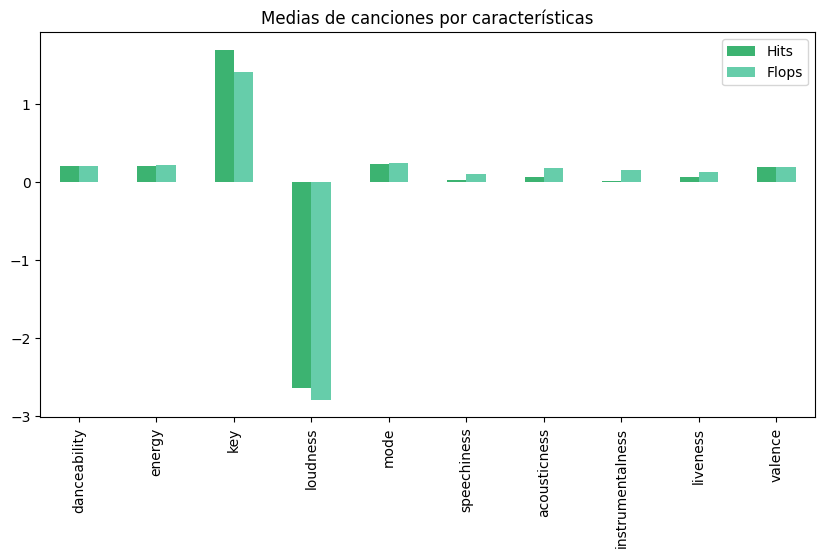

In [37]:
# Escalado

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
means_scaled = pd.DataFrame(ss.fit_transform(means),index= means.index, columns = means.columns)
means_scaled

# Gráfico

means_scaled.plot(kind = 'bar',
                  figsize=(10, 5),
                  color = ('mediumseagreen', 'mediumaquamarine'),
                  title = 'Medias de canciones por características')
plt.legend(labels=['Hits', 'Flops'], loc='upper right')
plt.show()

A juzgar por las diferencias en las medias entre éxitos y fracasos, parece haber una diferencia entre los dos tipos de canciones. Esto significa que posiblemente podríamos crear un modelo para predecir éxitos y fracasos en función de las características de las canciones.

## Insights preliminares

Luego del análisis exploratorio, se pudo obtener lo siguiente:

- Las canciones tienden a ser más bailables que menos bailables.
- Las canciones tienden a tener más energía que menos energía.
- La tonalidad de Do (C) es la más popular.
- Las canciones tienden a tener menos de 10 dB.
- La mayoría de las canciones están en escalas mayores.
- La mayoría de las canciones contienen más música que voz
- La mayoría de las canciones no son en vivo.
- La mayoría de las canciones no son acústicas.
- La mayoría de las canciones contienen música.
- Hay una buena mezcla de canciones alegres y tristes.
- La mayoría de las canciones tienen entre 80 y 90 bpm.
- La mayoría de las canciones están en 4/4.
- Existen claras diferencias entre las características de canciones exitosas vs los fracasos.